In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, isdir, join

In [2]:
results_dir = './results'
plt.rcParams.update({'font.size': 14})

Me_dirs = [d for d in listdir(f'{results_dir}') if isdir(f'{results_dir}/{d}') and 'Me' in d]
Me_dirs

['1PGB_Me_T003_g00', '1PGB_Me_T003_g20']

In [3]:
def load_data(Me_dir):
    files = [f for f in listdir(f'{results_dir}/{Me_dir}') if isfile(f'{results_dir}/{Me_dir}/{f}') and 'data' in f and not 'eq' in f]
    eq_files = [f for f in listdir(f'{results_dir}/{Me_dir}') if isfile(f'{results_dir}/{Me_dir}/{f}') and 'data' in f and 'eq' in f]
    assert len(files) == 1 and len(eq_files) == 1, 'Too many files'
    file, eq_file = files[0], eq_files[0]
    
    with open(f'{results_dir}/{Me_dir}/{file}', 'r') as file:
        lines = file.readlines()
    splitted_lines = np.array([line.split('\t') for line in lines]).astype(float)
    
    with open(f'{results_dir}/{Me_dir}/{eq_file}', 'r') as eq_file:
        eq_lines = eq_file.readlines()
    eq_splitted_lines = np.array([eq_line.split('\t') for eq_line in eq_lines]).astype(float)
    
    return eq_splitted_lines, splitted_lines

In [4]:
Me_dirs = ['1PGB_Me_T003_g00']

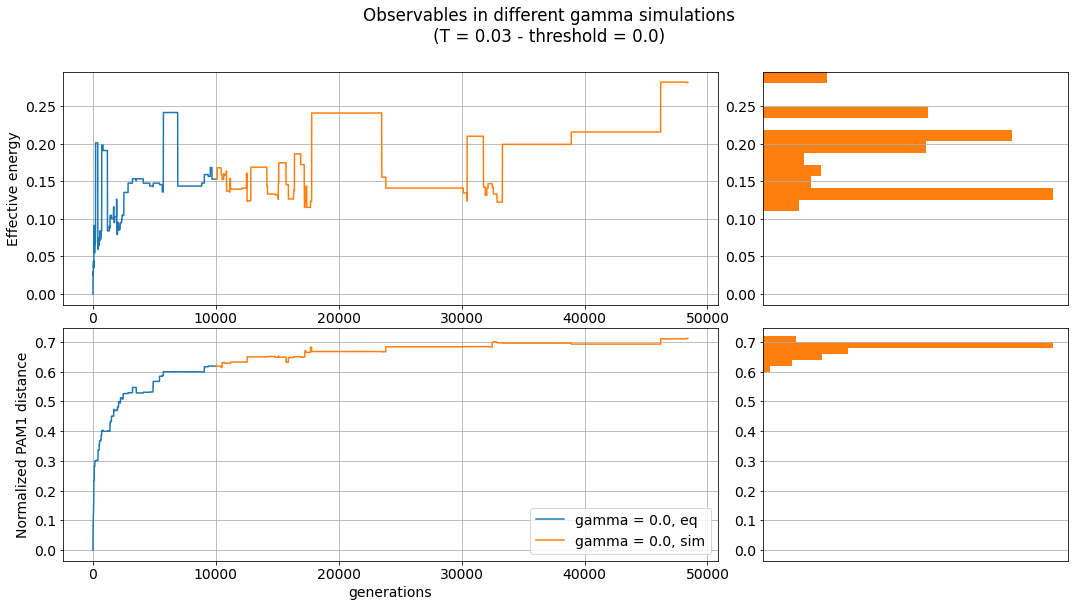

In [5]:
threshold = 0.
T = 0.03

fig, axs = plt.subplots(figsize = (18, 9), ncols = 3, nrows = 2)
fig.suptitle(f'Observables in different gamma simulations\n(T = {T} - threshold = {threshold})')

energy_gs = axs[0, 0].get_gridspec()
distance_gs = axs[1, 0].get_gridspec()
for ax in np.append(axs[0, :-1], axs[1, :-1]):
    ax.remove()
energy_ax = fig.add_subplot(energy_gs[0, :-1])
distance_ax = fig.add_subplot(distance_gs[1, :-1])

for idx, Me_dir in enumerate(Me_dirs):
    eq_data, data = load_data(Me_dir)
    eq_generations, generations = eq_data[:, 0], data[:, 0]
    tot_generations = np.append(eq_generations, generations[1:])
    gamma, seq_length = data[0, -2], data[0, -1]
    
    # energy
    eq_energy, energy = eq_data[:, 1], data[:, 1]
    
    energy_ax.plot(eq_generations, eq_energy, label = 'eq')
    energy_ax.plot(generations, energy, label = 'sim')
    energy_ax.set_ylabel('Effective energy')
    energy_ax.grid()
    lims = energy_ax.get_ylim()
    
    ax = axs[0, -1]
    color = energy_ax.get_lines()[1].get_color()
    bins = np.linspace(lims[0], lims[1], 21)
    ax.hist(energy, bins, density = True, color = color, orientation='horizontal')
    
    ax.set_ylim(lims)
    ax.set_xticks([])
    ax.yaxis.grid()
    
    # distance
    eq_distance, distance = eq_data[:, 3], data[:, 3]
    
    distance_ax.plot(eq_generations, eq_distance/seq_length, label = f'gamma = {gamma}, eq')
    distance_ax.plot(generations, distance/seq_length, label = f'gamma = {gamma}, sim')
    distance_ax.set_xlabel('generations')
    distance_ax.set_ylabel('Normalized PAM1 distance')
    distance_ax.legend(loc = 'lower right')
    distance_ax.grid()
    lims = distance_ax.get_ylim()
    
    ax = axs[1, -1]
    color = distance_ax.get_lines()[1].get_color()
    bins = np.linspace(0, 1, 51)
    ax.hist(distance/seq_length, bins, density = True, color = color, orientation='horizontal')
    
    ax.set_ylim(lims)
    ax.set_xticks([])
    ax.yaxis.grid()
    
plt.subplots_adjust(hspace = 0.1, wspace = 0.15)